## Encoding

Encoding: Değişkenlerin temsil şekillerini değiştirilmesi.
1) Label Encoding
    - Genel olarak sıralama içerikli sınıflandırmalarda kullanılır.

    - 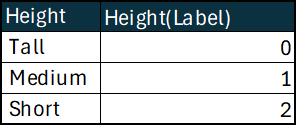


2) One hot Encoder
    -Genel olarak sıralama içerikli olmayan kategoriklerde kullanırız.
    
    - 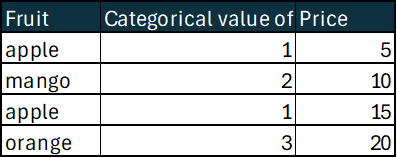

3) Rare Encoding

In [52]:
from  module import load_dataset, grab_col_names
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [3]:
# Pandas View Options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x:'%.3f' % x)
pd.set_option('display.width', 500)

In [6]:
df=load_dataset()

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


### Label Encoding & Binary Encoding

In [8]:
df["Sex"].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [10]:
le = LabelEncoder()
le.fit_transform(df["Sex"])[0:5]
#Alfebetik olarak atama yapar

array([1, 0, 0, 0, 1])

In [11]:
#Eğer ben trasnformlarımı unutursam, inverse_tranfor kullanabilirim
le.inverse_transform([0, 1])

array(['female', 'male'], dtype=object)

Eğer çok fazla kategorik değişkenim varsa aşağıdaki fonksiyonu kullanabilirim.

In [24]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [25]:

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

In [26]:
for col in binary_cols:
    label_encoder(df, col)

#eksik değerleri de direkt doldurma yapıyor dikkat. NA'lere dikkat

In [29]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [30]:
df["Embarked"].nunique()

3

In [32]:
#Eksik nan değerler için bu format kullanılabilir.
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [31]:
len(df["Embarked"].unique())

4

 
###  One-Hot Encoding

Eğer dummy yapacaksak ilk sütunun drop ederek işleme başlarız.

In [33]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [34]:
pd.get_dummies(df, columns=["Embarked"]).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000,1,0,A/5 21171,7.250,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000,1,0,PC 17599,71.283,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000,0,0,STON/O2. 3101282,7.925,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000,1,0,113803,53.100,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.000,0,0,373450,8.050,NaN,False,False,True


In [35]:
#drop first
pd.get_dummies(df, columns=["Embarked"], drop_first=True).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000,1,0,A/5 21171,7.250,NaN,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000,1,0,PC 17599,71.283,C85,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000,0,0,STON/O2. 3101282,7.925,NaN,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000,1,0,113803,53.100,C123,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.000,0,0,373450,8.050,NaN,False,True


In [36]:
pd.get_dummies(df, columns=["Embarked"], dummy_na=True).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000,1,0,A/5 21171,7.250,NaN,False,False,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000,1,0,PC 17599,71.283,C85,True,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000,0,0,STON/O2. 3101282,7.925,NaN,False,False,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000,1,0,113803,53.100,C123,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",1,35.000,0,0,373450,8.050,NaN,False,False,True,False


In [37]:
pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_1,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.000,1,0,A/5 21171,7.250,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000,1,0,PC 17599,71.283,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.000,0,0,STON/O2. 3101282,7.925,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000,1,0,113803,53.100,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.000,0,0,373450,8.050,NaN,True,False,True


In [38]:
# Cat cols functionss
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [39]:
# cat_cols, num_cols, cat_but_car = grab_col_names(df)
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

In [40]:
one_hot_encoder(df, ohe_cols).head()

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Cabin,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",1,22.000,A/5 21171,7.250,NaN,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000,PC 17599,71.283,C85,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",0,26.000,STON/O2. 3101282,7.925,NaN,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000,113803,53.100,C123,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
4,5,0,"Allen, Mr. William Henry",1,35.000,373450,8.050,NaN,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True


### Rare Encoding

1. Kategorik değişkenlerin azlık çokluk durumunun analiz edilmesi.
2. Rare kategoriler ile bağımlı değişken arasındaki ilişkinin analiz edilmesi.
3. Rare encoder yazacağız.

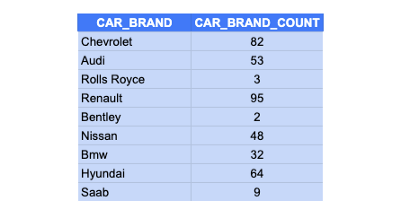

##### 1. Kategorik değişkenlerin azlık çokluk durumunun analiz edilmesi.

In [41]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 5


In [42]:
cat_cols

['Embarked', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch']

Bütün kategorik değişkenlerin toplu analizi

In [43]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

In [44]:
for col in cat_cols:
    cat_summary(df, col)

          Embarked  Ratio
Embarked                 
S              644 72.278
C              168 18.855
Q               77  8.642
##########################################
          Survived  Ratio
Survived                 
0              549 61.616
1              342 38.384
##########################################
        Pclass  Ratio
Pclass               
3          491 55.107
1          216 24.242
2          184 20.651
##########################################
     Sex  Ratio
Sex            
1    577 64.759
0    314 35.241
##########################################
       SibSp  Ratio
SibSp              
0        608 68.238
1        209 23.457
2         28  3.143
4         18  2.020
3         16  1.796
8          7  0.786
5          5  0.561
##########################################
       Parch  Ratio
Parch              
0        678 76.094
1        118 13.244
2         80  8.979
5          5  0.561
3          5  0.561
4          4  0.449
6          1  0.112
#################

#### 2. Rare kategoriler ile bağımlı değişken arasındaki ilişkinin analiz edilmesi.

In [45]:
df["Parch"].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [46]:
df.groupby("Parch")["Survived"].mean()

Parch
0   0.344
1   0.551
2   0.500
3   0.600
4   0.000
5   0.200
6   0.000
Name: Survived, dtype: float64

In [48]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

rare_analyser(df, "Survived", cat_cols)

Embarked : 3
          COUNT  RATIO  TARGET_MEAN
Embarked                           
C           168  0.189        0.554
Q            77  0.086        0.390
S           644  0.723        0.337


Survived : 2
          COUNT  RATIO  TARGET_MEAN
Survived                           
0           549  0.616        0.000
1           342  0.384        1.000


Pclass : 3
        COUNT  RATIO  TARGET_MEAN
Pclass                           
1         216  0.242        0.630
2         184  0.207        0.473
3         491  0.551        0.242


Sex : 2
     COUNT  RATIO  TARGET_MEAN
Sex                           
0      314  0.352        0.742
1      577  0.648        0.189


SibSp : 7
       COUNT  RATIO  TARGET_MEAN
SibSp                           
0        608  0.682        0.345
1        209  0.235        0.536
2         28  0.031        0.464
3         16  0.018        0.250
4         18  0.020        0.167
5          5  0.006        0.000
8          7  0.008        0.000


Parch : 7
       COU

#### Rare encoder'ın yazılması.

In [53]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

new_df = rare_encoder(df, 0.01)

In [54]:
rare_analyser(new_df, "Survived", cat_cols)

Embarked : 3
          COUNT  RATIO  TARGET_MEAN
Embarked                           
C           168  0.189        0.554
Q            77  0.086        0.390
S           644  0.723        0.337


Survived : 2
          COUNT  RATIO  TARGET_MEAN
Survived                           
0           549  0.616        0.000
1           342  0.384        1.000


Pclass : 3
        COUNT  RATIO  TARGET_MEAN
Pclass                           
1         216  0.242        0.630
2         184  0.207        0.473
3         491  0.551        0.242


Sex : 2
     COUNT  RATIO  TARGET_MEAN
Sex                           
0      314  0.352        0.742
1      577  0.648        0.189


SibSp : 7
       COUNT  RATIO  TARGET_MEAN
SibSp                           
0        608  0.682        0.345
1        209  0.235        0.536
2         28  0.031        0.464
3         16  0.018        0.250
4         18  0.020        0.167
5          5  0.006        0.000
8          7  0.008        0.000


Parch : 7
       COU

### Feature Scaling (Özellik Ölçeklendirme)

- Kullanılacak modellerin değişkenlere eşit şartlarda yaklaşmasını sağlama
- Özellikle gradient kullanırken modeli eğittiğimizde eğitim sürelerini kısaltmak için
- uzaklık temelli yöntemlerde büyük değerlere sahip değişkenlerin dominantlığından dolayı yanılgıya sebep olmaması için

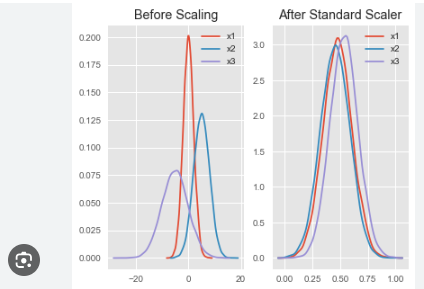

#### StandardScaler: Klasik standartlaştırma.
 Ortalamayı çıkar, standart sapmaya böl. z = (x - u) / s

In [55]:
ss = StandardScaler()
df["Age_standard_scaler"] = ss.fit_transform(df[["Age"]])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000,1,0,A/5 21171,7.250,NaN,S,-0.530
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000,1,0,PC 17599,71.283,C85,C,0.572
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,-0.255
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000,1,0,113803,53.100,C123,S,0.365
4,5,0,3,"Allen, Mr. William Henry",1,35.000,0,0,373450,8.050,NaN,S,0.365


#### RobustScaler
 Medyanı çıkar iqr'a böl.

In [56]:
rs = RobustScaler()
df["Age_robuts_scaler"] = rs.fit_transform(df[["Age"]])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Survived,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Sex,891.000,0.648,0.478,0.000,0.000,1.000,1.000,1.000
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
SibSp,891.000,0.523,1.103,0.000,0.000,0.000,1.000,8.000
Parch,891.000,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329
Age_standard_scaler,714.000,0.000,1.001,-2.017,-0.660,-0.117,0.572,3.465
Age_robuts_scaler,714.000,0.095,0.813,-1.543,-0.441,0.000,0.559,2.909


#### MinMaxScaler
 Verilen 2 değer arasında değişken dönüşümü

 - X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
- X_scaled = X_std * (max - min) + min

In [57]:
mms = MinMaxScaler()
df["Age_min_max_scaler"] = mms.fit_transform(df[["Age"]])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Survived,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Sex,891.000,0.648,0.478,0.000,0.000,1.000,1.000,1.000
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
SibSp,891.000,0.523,1.103,0.000,0.000,0.000,1.000,8.000
Parch,891.000,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329
Age_standard_scaler,714.000,0.000,1.001,-2.017,-0.660,-0.117,0.572,3.465
Age_robuts_scaler,714.000,0.095,0.813,-1.543,-0.441,0.000,0.559,2.909


In [58]:
age_cols = [col for col in df.columns if "Age" in col]

count   714.000
mean     29.699
std      14.526
min       0.420
5%        4.000
10%      14.000
20%      19.000
30%      22.000
40%      25.000
50%      28.000
60%      31.800
70%      36.000
80%      41.000
90%      50.000
95%      56.000
99%      65.870
max      80.000
Name: Age, dtype: float64


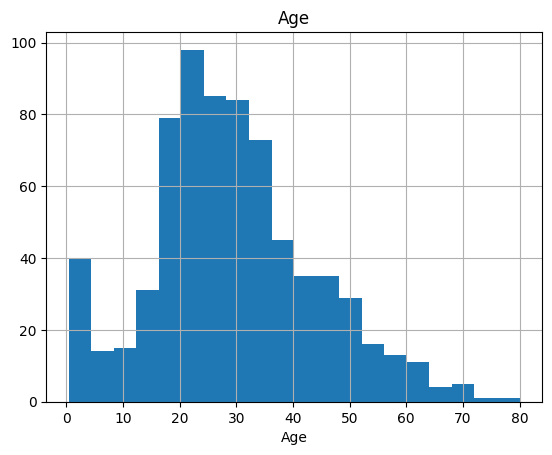

count   714.000
mean      0.000
std       1.001
min      -2.017
5%       -1.770
10%      -1.081
20%      -0.737
30%      -0.530
40%      -0.324
50%      -0.117
60%       0.145
70%       0.434
80%       0.778
90%       1.398
95%       1.812
99%       2.492
max       3.465
Name: Age_standard_scaler, dtype: float64


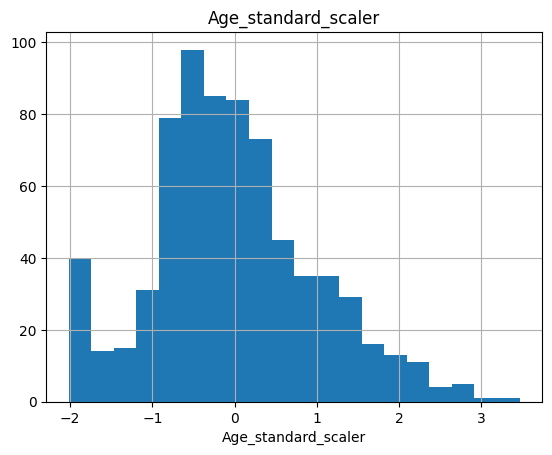

count   714.000
mean      0.095
std       0.813
min      -1.543
5%       -1.343
10%      -0.783
20%      -0.503
30%      -0.336
40%      -0.168
50%       0.000
60%       0.213
70%       0.448
80%       0.727
90%       1.231
95%       1.566
99%       2.119
max       2.909
Name: Age_robuts_scaler, dtype: float64


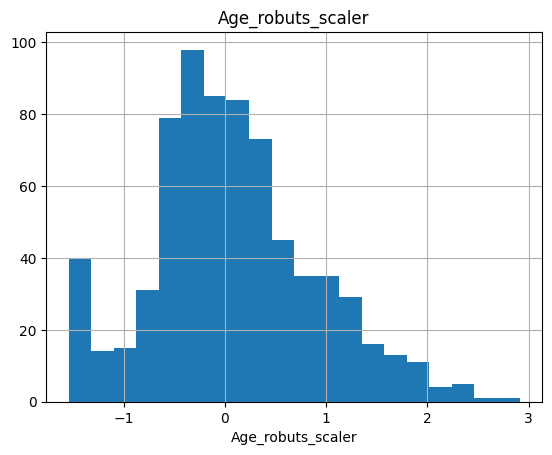

count   714.000
mean      0.368
std       0.183
min       0.000
5%        0.045
10%       0.171
20%       0.233
30%       0.271
40%       0.309
50%       0.347
60%       0.394
70%       0.447
80%       0.510
90%       0.623
95%       0.698
99%       0.822
max       1.000
Name: Age_min_max_scaler, dtype: float64


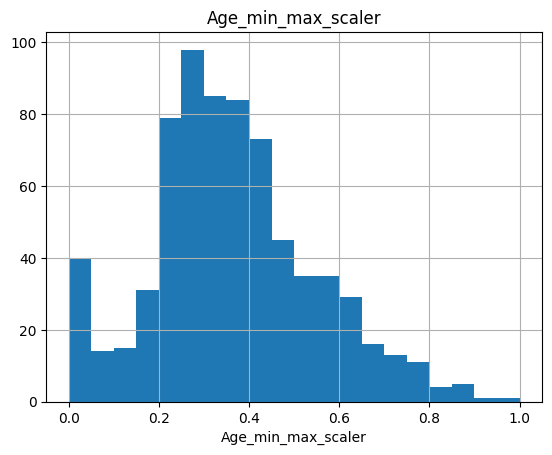

In [59]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

for col in age_cols:
    num_summary(df, col, plot=True)

#### Numeric to Categorical: Sayısal Değişkenleri Kateorik Değişkenlere Çevirme
- Binning

In [66]:
#qcut function kaç sınıfa ayırmak istiyorsak otomatik böler.
# qcut küçükten büyüğe sıralar ve çeyrek değerlere göre böler.
df["Age_qcut"] = pd.qcut(df['Age'], 5)
df["Age_qcut"].value_counts()

#istersek label girerek de bunu gerçekleştirebliriz.

Age_qcut
(0.419, 19.0]    164
(31.8, 41.0]     144
(41.0, 80.0]     142
(19.0, 25.0]     137
(25.0, 31.8]     127
Name: count, dtype: int64

In [67]:
# Etiketlerinizi tanımlayın
etiketler = ['Çok Genç', 'Genç', 'Orta Yaşlı', 'Yaşlı', 'Çok Yaşlı']

# Etiketleri kullanarak kategorik değişkenin değerlerini güncelleyin
df["Age_qcut"] = pd.qcut(df['Age'], 5, labels=etiketler)

# Etiketlendirilmiş kategorik değişkenin değerlerini görüntüleyin
print(df["Age_qcut"].value_counts())

Age_qcut
Çok Genç      164
Yaşlı         144
Çok Yaşlı     142
Genç          137
Orta Yaşlı    127
Name: count, dtype: int64
